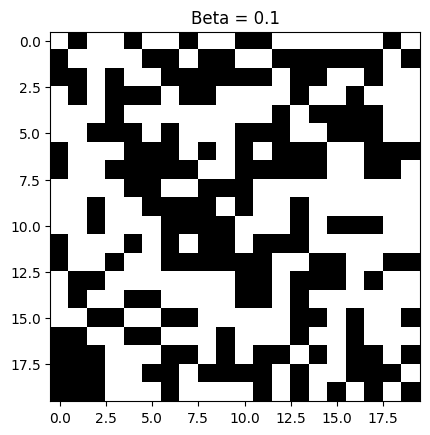

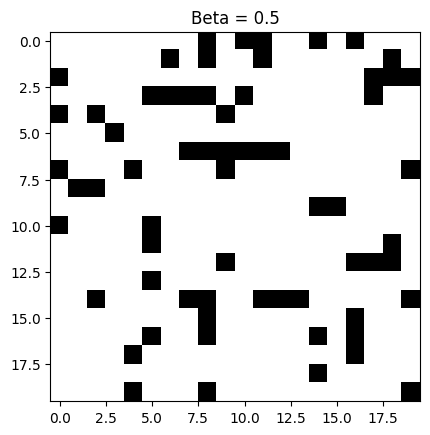

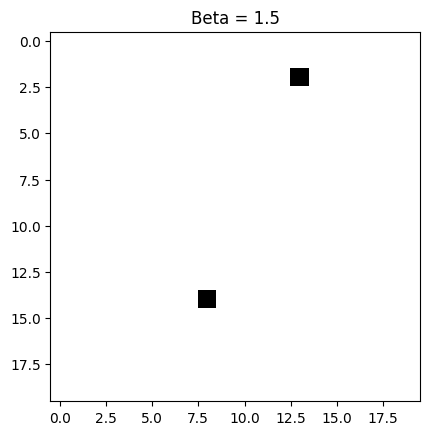

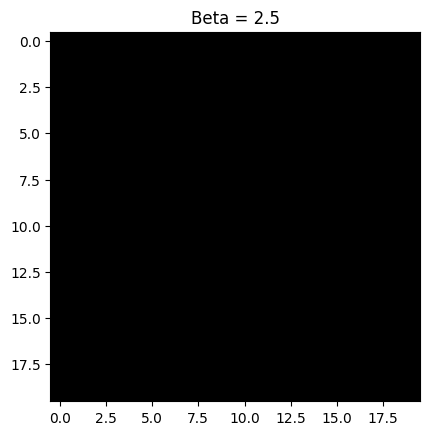

In [2]:
from modules.Gibbs_sampler import *

In [ ]:
# Parameters
L = 20  # Lattice size
alpha = 0  # No external field
betas = [0.1, 0.5, 1.5, 2.5]  # Different beta values

# Run and visualize for different beta values
for beta in betas:
    final_lattice = run_gibbs(L, alpha, beta, steps=1000)
    plot_lattice(final_lattice, title=f"Beta = {beta}")
